In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from data_analysis.helpers import *

In [38]:
line_styles = {
        "none": "C7",
        "vip": "r^",
        "vipsbw": "b^",
        "vip2": "rv",
        "vipsbw2": "bv",
        "mvip": "rv",
        "palfu": "ks",
        "pawlfu": "k*",
        "lfu": "ks",
        "wlfu": "k*",
        "lru": "gx",
        "fifo": "md",
        "unif": "yo",
    }
dashes = ["-", "--", ":"]

def plotter(
    param_list,
    filters,
    label,
    test_config,
    topology,
    db,
    metric,
    ax,
):
    param_list = filterParamList(param_list, filters)
    res = getDataFieldSumAvgsAcrossSeeds(
        topology,
        db,
        param_list,
        test_config["source_map_seed"],
        test_config["request_generator_seed"],
        metric,
    )
    if isinstance(res[0], list):
        assert len(res) == 1
        res = res[0]
    if metric in ["cache_hits","cache_replacements"]:
        ax.bar(label, res[0])
        ax.bar(label, res[1], bottom=res[0])
    else:
        ax.bar(label, res)

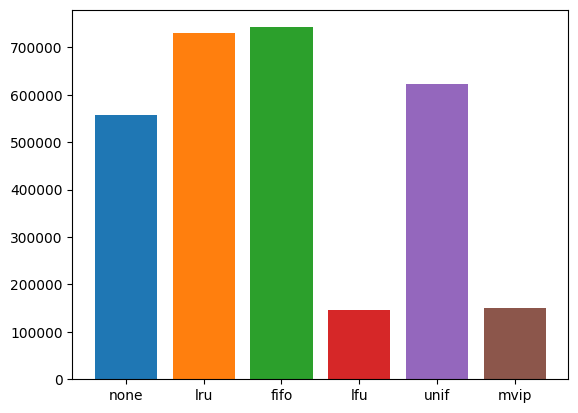

In [42]:
experiment_name = "some"
topology = "abilene"
config_path = "../sim_configs/" + experiment_name + "_config.json"
test_config = getTestConfig(config_path)
db_path = "../sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)

request_dist_param = 0.75
request_rate = 15
request_dist_type = "zipf"
cache_capacities = [(),(5,25)]
fwd_pol = ["lrt", "vip"]
case_filters = [
    ("cache_capacities", cache_capacities, None),
    #("fwd_pol", fwd_pol, None),
    #("cache_read_rates", [(25,), (25, 10)], None),
    #("request_dist_param", request_dist_param, None),
    #("request_dist_type", request_dist_type, None),
    #("request_rate", request_rate, None),
]
metric="delay"
param_list = simConfigToParamSets(test_config)
param_list = filterParamList(param_list, case_filters)
fig, ax = plt.subplots()

gen = (cache_pol for cache_pol in test_config["cache_pol"])
for cache_pol in gen:
    filters = [
        ("cache_pol", cache_pol, None),
    ]
    plotter(param_list, filters, cache_pol, test_config, topology, db, metric, ax)

plt.show()